In [15]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import torch
import torch.nn as nn
from torchsummary import summary

import matplotlib.pyplot as plt
%matplotlib inline  

from skimage.transform import resize

In [2]:
# from trainer import run

# model, result = run()
# torch.save(model, 'mnist.pth')

In [3]:
gradient = []
def save_gradient(*args): # takes module/grad_input/grad_output
    
    grad_input  = args[1]
    grad_output = args[2]
    gradient.append(grad_output[0])

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

from dataloader import get_dataloader
train_loader, _ = get_dataloader()

idx = 0
batch = next(iter(train_loader))
sample = batch[0][idx][None, ...].to(device=device, dtype=torch.float)
sample_label = batch[1][idx]

In [5]:
from model import CNN
model = CNN().to(device)
model = torch.load('mnist.pth')
h = model.layer[11].register_backward_hook(save_gradient)
# summary(model, input_size=(1, 28, 28))

In [7]:
output = model(sample).cpu()
output = torch.index_select(output, dim=1, index=sample_label)
output = torch.sum(output)

In [8]:
output.backward(retain_graph=True)

In [10]:
alpha = torch.sum(grad, dim=3)
alpha = torch.sum(alpha, dim=2)

In [11]:
result = torch.zeros(7, 7)
for a, g in zip(alpha[0].cpu(), grad[0].cpu()):
    result += a * g

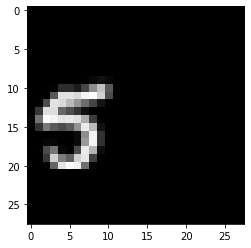

In [12]:
plt.imshow(sample[0][0].cpu().numpy(), cmap='gray')

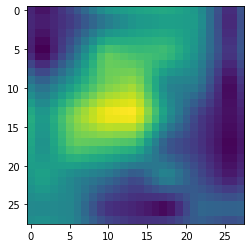

In [13]:
plt.imshow(resize(result.numpy(), output_shape=(28, 28)))